In [71]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn.datasets import load_svmlight_file
from sklearn.metrics import accuracy_score
import torch 
from sklearn import metrics

import seaborn as sns




Importing Dataset


In [25]:

X,y=load_svmlight_file("./std_data.txt")
X=pd.DataFrame(X.toarray())
y=pd.DataFrame(y)


Split Data to Train and Test set



In [74]:
def  split_data(X,y):
    np.random.seed(x)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33,stratify=y )
    return X_train, X_test, y_train, y_test
X_train, X_test, y_train, y_test=split_data(X,y)


X_train


NameError: name 'x' is not defined

In [333]:
class MyPerceptron :

    def __init__(self,X,y,epochs,bias=False):
        self.epochs=epochs   # number of epochs

          # initialising the weights
          # initialising the label with inputs
        self.lr=0.001 # initialising learning Rate
         # initialising the bias 
        self.error=[]  # initialising empty array to store loss 
        self.train_acc=[]
        self.test_acc=[]
        self.val_acc=[]
        self.best_weight=0
        self.accuracy_table=[]
        if bias:
            X=self.initalize_bias(X)
        self.weights=np.array(np.random.rand(1,X.shape[1]))
        self.X_train,self.X_test,self.X_val,self.y_train,self.y_test,self.y_val = self.split_data(X,y)# initalisig the features with input           
        # self.X_train=np.array(self.X_train)
        # self.X_test=np.array(self.X_test)
        # self.y_train=np.array(y_train)
        # self.y_test=np.array(y_test)


    def initalize_bias(self,X):
        tr=np.ones((X.shape[0],1))
        X=np.hstack((X,tr))
        return X
    
    
    def  split_data(self,X,y):
        
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42,stratify=y )
        X_train,X_val,y_train,y_val= train_test_split(X_train, y_train, test_size=0.2, random_state=42,stratify=y_train)
        
        return np.array(X_train), np.array(X_test),np.array(X_val), np.array(y_train), np.array(y_test),np.array(y_val)

    
        
    def zero_one_loss(self,X,weights,y):
        
        #step function which adds loss to missclassification 
        signum=y*(np.matmul(X,weights.T))
        if signum<=0:
            return 1
        else:
            return 0
    def hinge_loss(self,X,weights,y):
        return max(0,1-y*(np.matmul(X,weights.T)))
    def perceptron_loss(self,X,weights,y):
        
        return max(0,-y*(np.matmul(X,weights.T)))


    def pred_accuracy(self,X, y):
        y_preds = self.predict(X)
        accuracy = accuracy_score(y_preds,y)
        return accuracy

    
    def train(self,loss_fxn):
        # optimizing the weights to find the best descison boundry 
      
        for i in range(self.epochs):
            sum_of_errors=0
            for i in range(len(self.X_train)):
                sum_of_errors+=self.X_train[i]*self.y_train[i]*loss_fxn(self.X_train[i],self.weights,self.y_train[i])
            self.weights=self.weights+self.lr*(sum_of_errors)
            acc_train = self.pred_accuracy(self.X_train,self.y_train)
            acc_test=self.pred_accuracy(self.X_test,self.y_test)
            acc_val=self.pred_accuracy(self.X_val,self.y_val)
            self.train_acc.append(acc_train)
            self.test_acc.append(acc_test)
            self.val_acc.append(acc_val)
            self.accuracy_table.append({"weights":self.weights,"train_accuracy":acc_train,"test_accuracy":acc_test})


        
            
            
    
    def predict(self,X):
        #predicts the class based on the input features 
        y_pred=np.matmul(X,self.weights.T)
        y_pred[y_pred>0]=1
        y_pred[y_pred<0]=-1
        return y_pred
            
       
    def conf_matrix(self):
        cf_matrix = confusion_matrix(self.y_test,self.predict(X_test))
        sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, 
        fmt='.2%', cmap='Blues')
                   
    

    def  plot_error(self):
        #plot the error
        print(self.error)
        plt.plot(self.error)
        plt.show()
    def  plot_acc(self):
        #plot the error
        plt.plot(self.train_acc,label="training Accuracy")
        plt.plot(self.test_acc,label="testing accuracy")
        plt.plot(self.val_acc,label="validation accuracy")
        plt.legend()
        
    def get_conf(self):
        cf_matrix = confusion_matrix(self.y_test,b.predict(self.X_test))
        sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, 
            fmt='.2%', cmap='Blues')

    def  get_best_weights(self):
       
        print(sorted(self.accuracy_table,key=lambda k: k['test_accuracy'])[-1])
        
        


           
                
        
        

            



(254, 8)

{'weights': array([[0.30022338, 0.53965862, 0.06043934, 0.422761  , 0.14361759,
        0.28636788, 0.40805498, 0.15725659, 0.88455896]]), 'train_accuracy': 0.3381995133819951, 'test_accuracy': 0.38188976377952755}


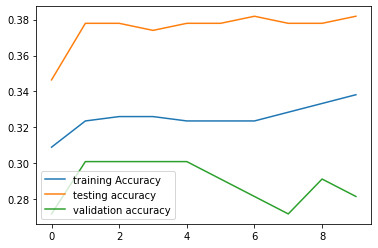

In [364]:
b=MyPerceptron(X,y,10,True)
b.train(b.perceptron_loss)

            
b.get_best_weights()
b.plot_acc()




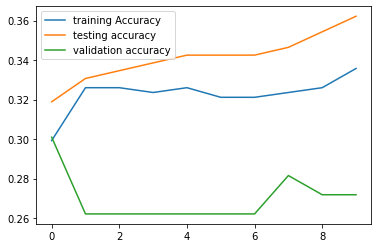

In [287]:

b.plot_acc()

{'weights': array([[-0.07291053, -0.24193796,  0.00566674,  0.11518526, -0.09609482,
         0.42109225, -0.33155681, -0.26773646]]), 'train_accuracy': 0.6618004866180048, 'test_accuracy': 0.6338582677165354}


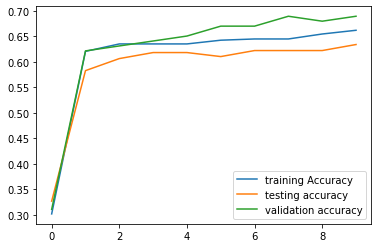

In [332]:

b=MyPerceptron(X,y,10,False)
b.train()
b.get_best_weights()
b.plot_acc()
            

In [292]:
b.get_best_weights()


array([[-0.18980728,  0.25943902,  0.75329573, -0.0640836 ,  0.32363269,
         0.54947725, -0.09487339,  0.00805253]])

(768, 9)

In [354]:

subset_df = X

from sklearn.preprocessing import StandardScaler
ss = StandardScaler()

scaled_df = ss.fit_transform(subset_df)
scaled_df = pd.DataFrame(scaled_df)
final_df = pd.concat([scaled_df,y], axis=1)
final_df.head()
final_df.iloc[:,:-1]
#plot parallel coordinates
from pandas.plotting import parallel_coordinates
pc = parallel_coordinates(final_df.iloc[:,:-1], pd.DataFrame(final_df.iloc[:,-1]), color=('#FFE888', '#FF9999'))

ValueError: Boolean array expected for the condition, not float64

In [353]:
type(final_df.iloc[:,:-1])

pandas.core.frame.DataFrame